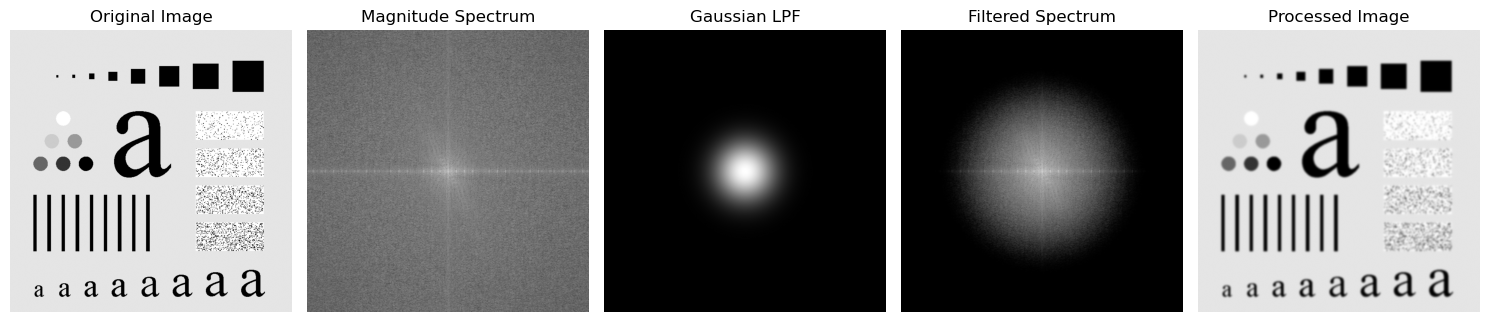

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from math import exp, sqrt

# Distance function between two points
def distance(p1, p2):
    return sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

# Gaussian Low Pass Filter function
def gaussian_lpf(D0, shape):
    rows, cols = shape
    center = (rows // 2, cols // 2)  # Image center
    filter_mask = np.zeros((rows, cols))  # Initialize the filter mask
    
    # Create the filter mask using the Gaussian function
    for y in range(rows):
        for x in range(cols):
            D = distance((y, x), center)  # Distance from the center
            filter_mask[y, x] = exp(- (D**2) / (2 * (D0**2)))  # Gaussian formula
    
    return filter_mask

# Function to apply Gaussian Low Pass Filter to an image
def apply_gaussian_lpf(image_path, D0):
    img = Image.open(image_path).convert('L')  # Load and convert image to grayscale
    img_array = np.array(img)

    # Fourier Transform and Shift
    dft = np.fft.fft2(img_array)
    dft_shift = np.fft.fftshift(dft)
    
    # Apply the Gaussian filter mask
    lpf = gaussian_lpf(D0, img_array.shape)
    filtered_dft = dft_shift * lpf

    # Inverse Fourier Transform
    inv_shift = np.fft.ifftshift(filtered_dft)
    processed_img = np.fft.ifft2(inv_shift)
    processed_img = np.abs(processed_img)

    # Plotting the results
    plt.figure(figsize=(15, 8))

    plt.subplot(1, 5, 1)
    plt.imshow(img_array, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 5, 2)
    plt.imshow(np.log(1 + np.abs(dft_shift)), cmap='gray')
    plt.title('Magnitude Spectrum')
    plt.axis('off')

    plt.subplot(1, 5, 3)
    plt.imshow(lpf, cmap='gray')
    plt.title('Gaussian LPF')
    plt.axis('off')

    plt.subplot(1, 5, 4)
    plt.imshow(np.log(1 + np.abs(filtered_dft)), cmap='gray')
    plt.title('Filtered Spectrum')
    plt.axis('off')

    plt.subplot(1, 5, 5)
    plt.imshow(processed_img, cmap='gray')
    plt.title('Processed Image')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

# Example usage
image_path = r"C:/Users/gaura/Downloads/character (1).tif"
D0 = 50  # Cutoff frequency
apply_gaussian_lpf(image_path, D0)


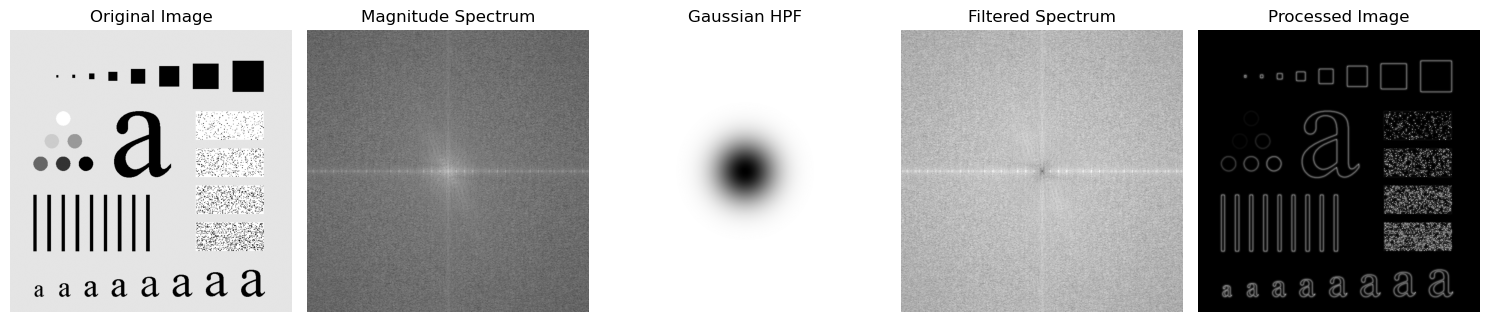

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from math import exp, sqrt

# Distance function between two points
def distance(p1, p2):
    return sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

# Gaussian High Pass Filter function
def gaussian_hpf(D0, shape):
    rows, cols = shape
    center = (rows // 2, cols // 2)  # Image center
    filter_mask = np.zeros((rows, cols))  # Initialize the filter mask
    
    # Create the filter mask using the Gaussian High Pass formula
    for y in range(rows):
        for x in range(cols):
            D = distance((y, x), center)  # Distance from the center
            filter_mask[y, x] = 1 - exp(- (D**2) / (2 * (D0**2)))  # Gaussian High Pass formula
    
    return filter_mask

# Function to apply Gaussian High Pass Filter to an image
def apply_gaussian_hpf(image_path, D0):
    img = Image.open(image_path).convert('L')  # Load and convert image to grayscale
    img_array = np.array(img)

    # Fourier Transform and Shift
    dft = np.fft.fft2(img_array)
    dft_shift = np.fft.fftshift(dft)
    
    # Apply the Gaussian filter mask
    hpf = gaussian_hpf(D0, img_array.shape)
    filtered_dft = dft_shift * hpf

    # Inverse Fourier Transform
    inv_shift = np.fft.ifftshift(filtered_dft)
    processed_img = np.fft.ifft2(inv_shift)
    processed_img = np.abs(processed_img)

    # Plotting the results
    plt.figure(figsize=(15, 8))

    plt.subplot(1, 5, 1)
    plt.imshow(img_array, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 5, 2)
    plt.imshow(np.log(1 + np.abs(dft_shift)), cmap='gray')
    plt.title('Magnitude Spectrum')
    plt.axis('off')

    plt.subplot(1, 5, 3)
    plt.imshow(hpf, cmap='gray')
    plt.title('Gaussian HPF')
    plt.axis('off')

    plt.subplot(1, 5, 4)
    plt.imshow(np.log(1 + np.abs(filtered_dft)), cmap='gray')
    plt.title('Filtered Spectrum')
    plt.axis('off')

    plt.subplot(1, 5, 5)
    plt.imshow(processed_img, cmap='gray')
    plt.title('Processed Image')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

# Example usage
image_path = r"C:/Users/gaura/Downloads/character (1).tif"
D0 = 50  # Cutoff frequency
apply_gaussian_hpf(image_path, D0)
